In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

Now consider the apple and orange pattern recognition problem. Because there are only two categories, we can use a single-neuron perceptron. The vector inputs are three-dimensional ( R = 3 ), therefore the perceptron equation will be

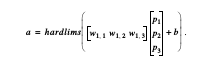

## Pattern Recognition: Apple vs. Orange Classification

In this example, we will explore the apple and orange pattern recognition problem using a single-neuron perceptron. Our goal is to classify inputs based on their features into two categories: apples and oranges.

### Problem Statement

We have three-dimensional vector inputs, represented as:

$$
\mathbf{p} = 
\begin{pmatrix}
p_1 \\
p_2 \\
p_3
\end{pmatrix}
$$

We aim to design the perceptron such that:

- The output is $1$ when an apple is input.
- The output is $-1$ when an orange is input.

The perceptron equation can be defined as:

$$
a = \text{hardlims}(\mathbf{W} \cdot \mathbf{p} + b)
$$

Where $\mathbf{W}$ is the weight matrix, and $b$ is the bias.

## Choosing Weights and Bias

To separate the two categories, we can select a linear decision boundary. The decision boundary in this case is defined in the $p_1$-$p_3$ plane, described by the equation:

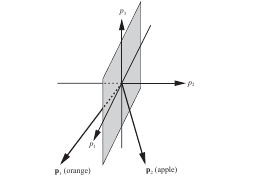
Fig. 1. Prototype Vectors


$$
p_2 = 0
$$

This can also be expressed as:

$$
0 \cdot p_1 + 1 \cdot p_2 + 0 \cdot p_3 + 0 = 0
$$

Thus, we can define the weight matrix and bias as follows:

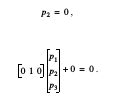

 

$$
\mathbf{W} = 
\begin{pmatrix}
0 & 1 & 0
\end{pmatrix}, \quad b = 0
$$

## Testing the Perceptron

Now let's test the operation of our perceptron classifier.

### Classification of a Perfect Orange

For a perfect orange with input vector:

$$
\mathbf{p}_{\text{orange}} = 
\begin{pmatrix}
1 \\
0 \\
-1
\end{pmatrix}
$$

The output of the perceptron is calculated as:

$$
a = \text{hardlims}\left(\begin{pmatrix}
0 & 1 & 0
\end{pmatrix} \cdot \begin{pmatrix}
1 \\
0 \\
-1
\end{pmatrix} + 0\right) = -1 \quad (\text{orange})
$$

### Classification of a Perfect Apple

For a perfect apple with input vector:

$$
\mathbf{p}_{\text{apple}} = 
\begin{pmatrix}
1 \\
1 \\
-1
\end{pmatrix}
$$

The output is:

$$
a = \text{hardlims}\left(\begin{pmatrix}
0 & 1 & 0
\end{pmatrix} \cdot \begin{pmatrix}
1 \\
1 \\
-1
\end{pmatrix} + 0\right) = 1 \quad (\text{apple})
$$

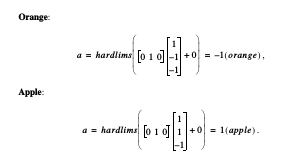



### Classification of a Not-So-Perfect Orange

Let's test with an input vector for a not-so-perfect orange:

$$
\mathbf{p}_{\text{not-so-perfect orange}} = 
\begin{pmatrix}
-1 \\
-1 \\
-1
\end{pmatrix}
$$

The output would be:

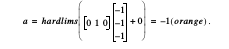

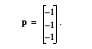

$$
a = \text{hardlims}\left(\begin{pmatrix}
0 & 1 & 0
\end{pmatrix} \cdot \begin{pmatrix}
-1 \\
-1 \\
-1
\end{pmatrix} + 0\right) = -1 \quad (\text{orange})
$$

## Conclusion

In this example, we demonstrated how the single-layer perceptron can classify perfect and imperfect examples of apples and oranges. The next chapters will explore learning algorithms and multilayer perceptrons, which can address more complex classification problems with nonlinear boundaries.


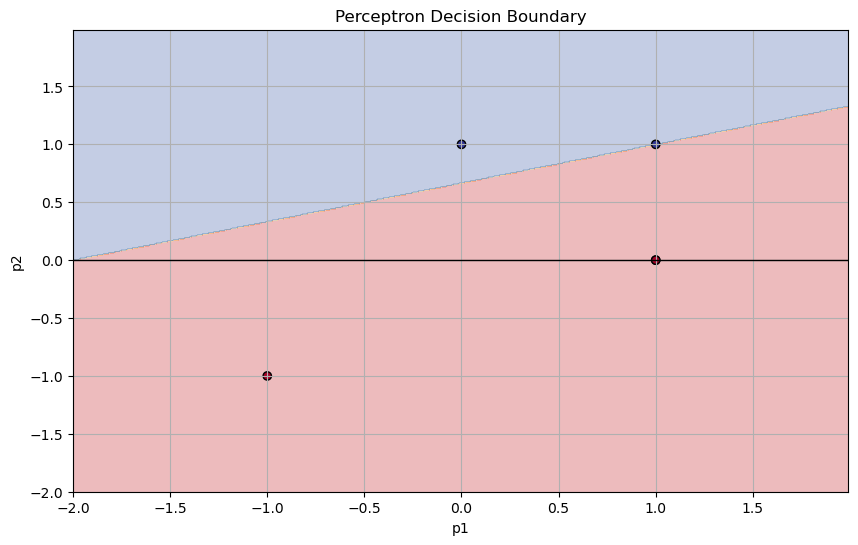

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=100):
        self.learning_rate = learning_rate  # Learning rate for weight updates
        self.n_iter = n_iter                  # Number of iterations for training
        self.weights = None                   # Weight matrix
        self.bias = None                      # Bias

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training process
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                
                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return 1 if x >= 0 else -1  # Hard limit function

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(x) for x in linear_output])

    def plot_decision_boundary(self, X, y):
        # Create grid points for the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        
        # Predict the class for each point in the grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])  # Using p3 = 0
        Z = Z.reshape(xx.shape)

        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
        plt.title('Perceptron Decision Boundary')
        plt.xlabel('p1')
        plt.ylabel('p2')
        plt.axhline(0, color='black', lw=1)  # Add the p2 = 0 line for reference
        plt.grid()
        plt.show()

# Example data: each row represents a sample (p1, p2, p3)
# Labels: 1 for apple, -1 for orange
X = np.array([[1, 1, -1],   # Apple
              [1, 0, -1],   # Orange
              [0, 1, -1],   # Apple
              [1, 0, 1],    # Orange
              [-1, -1, -1]]) # Not-so-perfect orange

y = np.array([1, -1, 1, -1, -1])  # Corresponding labels

# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y)

# Plot the decision boundary and training data
perceptron.plot_decision_boundary(X[:, :2], y)  # Use only p1 and p2 for plotting


# Hamming Network

The Hamming network, introduced by Lippmann [Lipp87], is designed explicitly to solve binary pattern recognition problems, where each element of the input vector has only two possible values (e.g., 1 or -1). This network utilizes both feedforward and recurrent (feedback) layers.

## Network Architecture

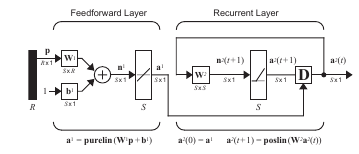

Fig. 5. Hamming Network

The objective of the Hamming network is to determine which prototype vector is closest to the input vector. The output of the recurrent layer indicates this decision. Each neuron in the recurrent layer corresponds to a prototype pattern. Upon convergence, only one neuron will have a non-zero output, indicating the closest prototype pattern.

## Feedforward Layer

The feedforward layer performs a correlation, or inner product, between each prototype pattern and the input pattern. The equations are defined as follows:

1. **Weight Matrix**: The weight matrix for the feedforward layer, \(W_1\), is set to the prototype patterns. For our example of apples and oranges:

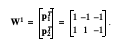

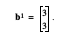




   $$
   p_1^T W_1 = \begin{bmatrix} 1 & -1 & -1 \end{bmatrix}
   $$

   $$
   p_2^T W_1 = \begin{bmatrix} 1 & 1 & -1 \end{bmatrix}
   $$

2. **Bias Vector**: Each element of the bias vector \(b_1\) is equal to \(R\), where \(R\) is the number of elements in the input vector:

   $$
   b_1 = 3
   $$

3. **Output Calculation**: The output of the feedforward layer is given by:

   $$
   a_1 = W_1 p + b_1
   $$

   This can be expressed as:

   $$
   a_1 = \begin{bmatrix} p_1^T \\ p_2^T \end{bmatrix} \begin{bmatrix} 1 & -1 & -1 \\ 1 & 1 & -1 \end{bmatrix} + \begin{bmatrix} 3 \\ 3 \end{bmatrix}
   $$

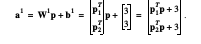

   The outputs of the feedforward layer represent the inner products of each prototype pattern with the input, plus \(R\). 

## Recurrent Layer

The recurrent layer is a competitive layer where the neurons compete to determine a winner. The following equations describe the competition:

1. **Initial Condition**:

   $$
   a_2(0) = a_1
   $$
   
   
   
   

2. **Update Rule**:

   $$
   a_2(t + 1) = \text{poslin}(W_2 a_2(t))
   $$

   The weight matrix \(W_2\) is defined as:

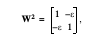

   $$
   W_2 = \begin{bmatrix} 1 & -\epsilon \\ -\epsilon & 1 \end{bmatrix}
   $$

   where $\epsilon$ is a small positive number less than $ \frac{1}{S - 1} $, and $S$ is the number of neurons in the recurrent layer.

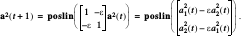

### Example Operation

To illustrate the operation of the Hamming network, consider the input vector:

$$
p = \begin{bmatrix} -1 \\ -1 \end{bmatrix}
$$

The output of the feedforward layer is computed as:

$$
a_1 = \begin{bmatrix} 1 & -1 & -1 \\ 1 & 1 & -1 \end{bmatrix} \begin{bmatrix} -1 \\ -1 \\ -1 \end{bmatrix} + \begin{bmatrix} 3 \\ 3 \end{bmatrix}
$$

This produces:

$$
a_1 = \begin{bmatrix} 4 \\ 2 \end{bmatrix}
$$

The first neuron corresponds to the orange prototype, indicating a closer match.

### Convergence of Recurrent Layer

The recurrent layer iteratively processes the outputs, updating them based on the competitive dynamics:

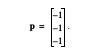

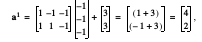


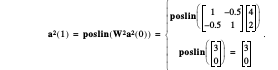

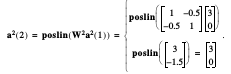

1. **First Iteration**:

   $$
   a_2(1) = \text{poslin}(W_2 a_2(0))
   $$

   The output of the first iteration would be computed similarly.

2. **Subsequent Iterations**: The process continues until convergence, resulting in only one non-zero output indicating the closest prototype.

## Conclusion

The Hamming network effectively identifies the prototype pattern closest to an input vector through a combination of feedforward processing and recurrent competition. This network's design principles are foundational for understanding more complex neural networks and competitive learning paradigms.


The input vector [-1 -1 -1] is classified as: Orange


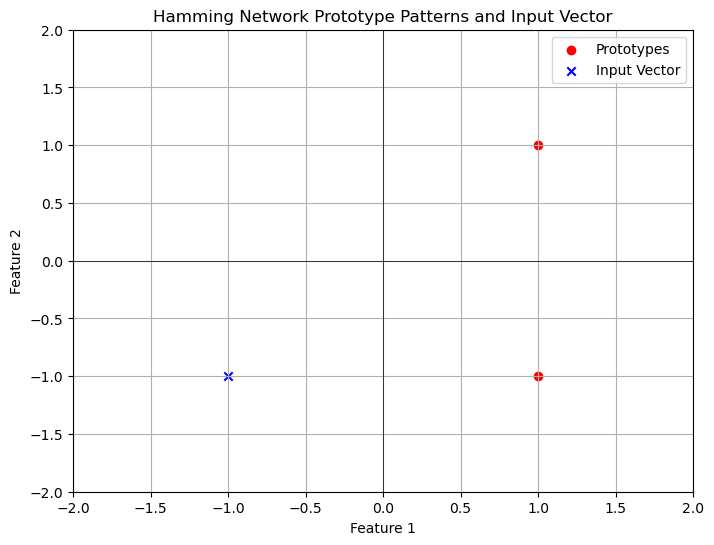

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class HammingNetwork:
    def __init__(self, prototype_patterns):
        self.prototype_patterns = prototype_patterns  # Prototype patterns
        self.num_prototypes = prototype_patterns.shape[0]  # Number of prototypes
        self.input_dim = prototype_patterns.shape[1]  # Dimension of the input
        self.W1 = prototype_patterns  # Weight matrix for the feedforward layer
        self.b1 = np.full((self.num_prototypes,), self.input_dim)  # Bias vector

    def feedforward(self, input_vector):
        # Compute the feedforward output (inner product + bias)
        a1 = np.dot(self.W1, input_vector) + self.b1
        return a1

    def recurrent(self, a1, epsilon=0.5):
        # Initialize output of the recurrent layer
        a2 = a1.copy()
        # Weight matrix for the recurrent layer
        W2 = np.array([[1, -epsilon], [-epsilon, 1]])
        
        # Iterate to find the winning neuron
        for _ in range(10):  # Arbitrary number of iterations for convergence
            a2 = np.dot(W2, a2)  # Linear transformation
            a2 = np.maximum(a2, 0)  # Apply poslin (ReLU)
            # Check for convergence
            if np.all(a2 == np.maximum(a2[0], a2[1])):  
                break
        return a2

    def classify(self, input_vector):
        # Classify the input vector
        a1 = self.feedforward(input_vector)  # Feedforward phase
        a2 = self.recurrent(a1)  # Recurrent phase
        winner_index = np.argmax(a2)  # Index of the neuron with the highest output
        return winner_index

# Prototype patterns for apple and orange
apple_pattern = np.array([1, 1, -1])
orange_pattern = np.array([1, -1, -1])
prototype_patterns = np.array([apple_pattern, orange_pattern])

# Initialize Hamming Network
hamming_network = HammingNetwork(prototype_patterns)

# Test with an input vector representing an orange
test_vector = np.array([-1, -1, -1])
result_index = hamming_network.classify(test_vector)

# Output the classification result
classification = ["Apple", "Orange"]
print(f"The input vector {test_vector} is classified as: {classification[result_index]}")

# Visualization of prototype patterns and input
plt.figure(figsize=(8, 6))
plt.scatter(prototype_patterns[:, 0], prototype_patterns[:, 1], color='red', label='Prototypes')
plt.scatter(test_vector[0], test_vector[1], color='blue', marker='x', label='Input Vector')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Hamming Network Prototype Patterns and Input Vector")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


# Hopfield Network

The Hopfield network is a recurrent network that can effectively perform the operations of both layers of the Hamming network. This network is initialized with the input vector and iterates until the output converges to one of the prototype vectors.

## Network Structure

A diagram of the Hopfield network is shown below:

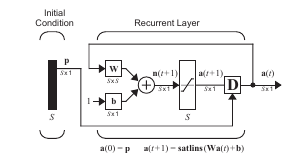

Fig. 6. Hopfield Network

### Initial Condition



$$
a(0) = p
$$

### Recurrent Layer Update



$$
a(t + 1) = \text{satlins}(W a(t) + b)
$$

Where `satlins` is the transfer function defined as:

$$
\text{satlins}(x) =
\begin{cases}
1, & \text{if } x > 1 \\
x, & \text{if } -1 \leq x \leq 1 \\
-1, & \text{if } x < -1
\end{cases}
$$

### Weight Matrix and Bias Vector
The weight matrix $ W $ and bias vector $ b $ for the Hopfield network are defined as:

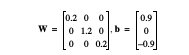

$$
W = \begin{bmatrix}
0.2 & 0 & 0 \\
0.9 & 1.2 & 0 \\
0 & 0 & 0.2
\end{bmatrix}, \quad
b = \begin{bmatrix}
0 \\
0 \\
-0.9
\end{bmatrix}
$$


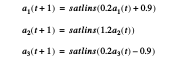

    
### Operation Equations
The equations of operation of the Hopfield network are:

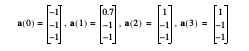

$$
\begin{align*}
a_1(t + 1) & = \text{satlins}(0.2 a_1(t) + 0.9) \\
a_2(t + 1) & = \text{satlins}(1.2 a_2(t)) \\
a_3(t + 1) & = \text{satlins}(0.2 a_3(t) - 0.9)
\end{align*}
$$

### Convergence Behavior
Regardless of the initial values \( a_i(0) \), the first element will be increased until it saturates at 1, and the third element will be decreased until it saturates at -1. The second element is multiplied by a number larger than 1, which means if it is initially negative, it will eventually saturate at -1, and if it is initially positive, it will saturate at 1.

### Example
Let’s consider the following input pattern representing an oblong orange:
$$
a(0) = \begin{bmatrix}
-1 \\
-1 \\
-1
\end{bmatrix}
$$

The outputs of the Hopfield network for the first three iterations would be:
$$
\begin{align*}
a(1) & = \begin{bmatrix}
1 \\
1 \\
-1
\end{bmatrix} \\
a(2) & = \begin{bmatrix}
1 \\
1 \\
-1
\end{bmatrix} \\
a(3) & = \begin{bmatrix}
1 \\
1 \\
-1
\end{bmatrix}
\end{align*}
$$

Thus, the network has converged to the orange pattern.

### Summary
The Hopfield network produces the selected prototype pattern at its output, unlike the Hamming network, where a nonzero neuron indicates which prototype pattern is chosen. Experimentation with the Hopfield network can help solidify understanding of its operation and convergence behavior.


The input vector [-1 -1 -1] is classified as: Orange
The input vector [ 1  1 -1] is classified as: Apple


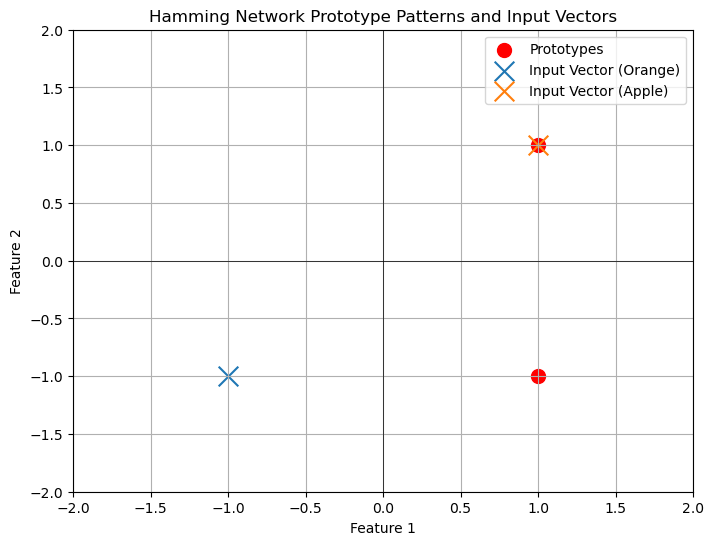

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class HammingNetwork:
    def __init__(self, prototype_patterns):
        """
        Initialize the Hamming Network with prototype patterns.

        Parameters:
        - prototype_patterns: Array of prototype patterns for classification.
        """
        self.prototype_patterns = prototype_patterns  # Prototype patterns
        self.num_prototypes = prototype_patterns.shape[0]  # Number of prototypes
        self.input_dim = prototype_patterns.shape[1]  # Dimension of the input
        self.W1 = prototype_patterns  # Weight matrix for the feedforward layer
        self.b1 = np.full((self.num_prototypes,), self.input_dim)  # Bias vector

    def feedforward(self, input_vector):
        """
        Compute the feedforward output.

        Parameters:
        - input_vector: Input vector for classification.

        Returns:
        - a1: Output of the feedforward layer.
        """
        # Compute the feedforward output (inner product + bias)
        a1 = np.dot(self.W1, input_vector) + self.b1
        return a1

    def recurrent(self, a1, epsilon=0.5):
        """
        Compute the recurrent output to find the winning neuron.

        Parameters:
        - a1: Output of the feedforward layer.
        - epsilon: Value used to adjust the weights in the recurrent layer.

        Returns:
        - a2: Output of the recurrent layer after convergence.
        """
        # Initialize output of the recurrent layer
        a2 = a1.copy()
        # Weight matrix for the recurrent layer
        W2 = np.array([[1, -epsilon], [-epsilon, 1]])
        
        # Iterate to find the winning neuron
        for _ in range(10):  # Arbitrary number of iterations for convergence
            a2 = np.dot(W2, a2)  # Linear transformation
            a2 = np.maximum(a2, 0)  # Apply poslin (ReLU)
            # Check for convergence
            if np.all(a2 == np.maximum(a2[0], a2[1])):  
                break
        return a2

    def classify(self, input_vector):
        """
        Classify the input vector using the Hamming Network.

        Parameters:
        - input_vector: The input vector to classify.

        Returns:
        - winner_index: Index of the winning prototype pattern.
        """
        a1 = self.feedforward(input_vector)  # Feedforward phase
        a2 = self.recurrent(a1)  # Recurrent phase
        winner_index = np.argmax(a2)  # Index of the neuron with the highest output
        return winner_index

# Prototype patterns for apple and orange
apple_pattern = np.array([1, 1, -1])
orange_pattern = np.array([1, -1, -1])
prototype_patterns = np.array([apple_pattern, orange_pattern])

# Initialize Hamming Network
hamming_network = HammingNetwork(prototype_patterns)

# Test with input vectors representing an orange and an apple
test_vectors = {
    "Orange": np.array([-1, -1, -1]),
    "Apple": np.array([1, 1, -1])
}

for fruit, test_vector in test_vectors.items():
    result_index = hamming_network.classify(test_vector)
    classification = ["Apple", "Orange"]
    print(f"The input vector {test_vector} is classified as: {classification[result_index]}")

# Visualization of prototype patterns and input
plt.figure(figsize=(8, 6))
plt.scatter(prototype_patterns[:, 0], prototype_patterns[:, 1], color='red', label='Prototypes', s=100)
for label, vec in test_vectors.items():
    plt.scatter(vec[0], vec[1], marker='x', label=f'Input Vector ({label})', s=200)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Hamming Network Prototype Patterns and Input Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


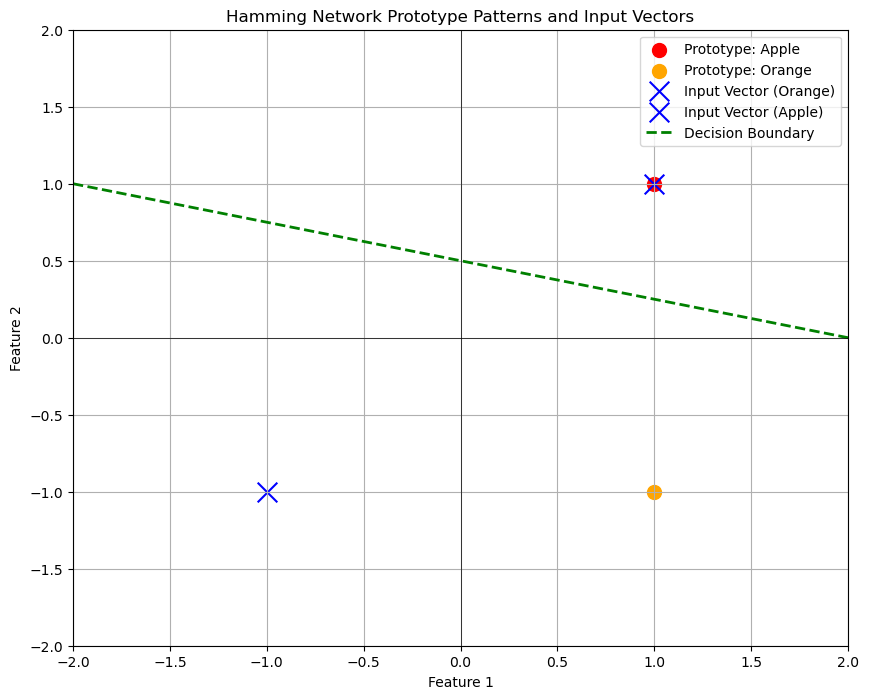

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class HammingNetwork:
    def __init__(self, prototype_patterns):
        self.prototype_patterns = prototype_patterns
        self.num_prototypes = prototype_patterns.shape[0]
        self.input_dim = prototype_patterns.shape[1]
        self.W1 = prototype_patterns
        self.b1 = np.full((self.num_prototypes,), self.input_dim)

    def feedforward(self, input_vector):
        a1 = np.dot(self.W1, input_vector) + self.b1
        return a1

    def recurrent(self, a1, epsilon=0.5):
        a2 = a1.copy()
        W2 = np.array([[1, -epsilon], [-epsilon, 1]])
        
        for _ in range(10):
            a2 = np.dot(W2, a2)
            a2 = np.maximum(a2, 0)
            if np.all(a2 == np.maximum(a2[0], a2[1])):
                break
        return a2

    def classify(self, input_vector):
        a1 = self.feedforward(input_vector)
        a2 = self.recurrent(a1)
        winner_index = np.argmax(a2)
        return winner_index

# Prototype patterns for apple and orange
apple_pattern = np.array([1, 1, -1])
orange_pattern = np.array([1, -1, -1])
prototype_patterns = np.array([apple_pattern, orange_pattern])

# Initialize Hamming Network
hamming_network = HammingNetwork(prototype_patterns)

# Test with input vectors representing an orange and an apple
test_vectors = {
    "Orange": np.array([-1, -1, -1]),
    "Apple": np.array([1, 1, -1])
}

# Prepare data for visualization
inputs = np.array([[-1, -1, -1], [1, 1, -1]])
results = []

for test_vector in inputs:
    result_index = hamming_network.classify(test_vector)
    results.append(result_index)

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot prototype patterns
for idx, prototype in enumerate(prototype_patterns):
    plt.scatter(prototype[0], prototype[1], color='red' if idx == 0 else 'orange', label='Prototype: ' + ['Apple', 'Orange'][idx], s=100)

# Plot input vectors
for label, vec in test_vectors.items():
    plt.scatter(vec[0], vec[1], marker='x', color='blue', label=f'Input Vector ({label})', s=200)

# Decision boundary visualization
x = np.linspace(-2, 2, 400)
y = 0.5 * (1 - 0.5 * x)  # Simplified decision boundary based on prototype distances

plt.plot(x, y, 'g--', label='Decision Boundary', linewidth=2)

# Formatting the plot
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Hamming Network Prototype Patterns and Input Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()
